In [1]:
import konlpy
from konlpy.tag import Okt   # OKt: Open Korean text
okt = Okt()

In [2]:
with open('title.txt', 'r', encoding='utf-8') as f:
    my_text = f.read()

In [8]:
tokens = okt.nouns(my_text)
tokens[40:50]

['목감천', '도림천', '새싹따릉', '서울', '자전거', '따릉', '타고', '라이딩', '따릉', '타고']

In [9]:
len(tokens)

21476

In [13]:
tokens.count('공원')

375

In [12]:
tokens.count('카페')

95

In [11]:
tokens.count('맛집')

54

In [19]:
import nltk

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

- 아래 두 셀을 반복해서 실행하여 stop_words를 갱신하다

In [81]:
stop_words=['따릉','뉴따릉','이용','방법','타고','매일','따릉이타','라이딩','일기','천원','더','서울','자전거','서울시','가기','형','구경','티머니','오늘','따릉이','새싹따릉','바퀴','추천','반납','고고','대여','주말','이준석','후기','코스','나','공유','용법','릉','날','첫','가격','집','제로','기특','페이','할인','꿀팁','법','및','첨','후','정기권','점','기록','곳','기','수','따릉따릉','두','달리기']
tokens=[word for word in tokens if word not in stop_words]
tokens[:10]

['언택트', '나들이', '초대', '코드', '여의도', '현대', '무료', '스벅', '쿠폰', '드림']

In [82]:
my_title = nltk.Text(tokens, name='bicycle')

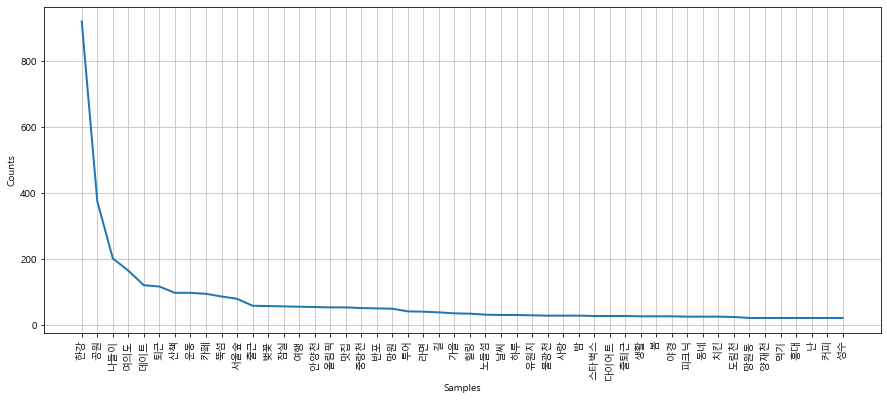

In [83]:
my_title = nltk.Text(tokens, name='bicycle')
plt.figure(figsize=(15,6))
my_title.plot(50)
plt.show()

- 워클 그리기

In [15]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [90]:
data=my_title.vocab().most_common(1000)
wc=WordCloud(
    font_path='C:/windows/fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

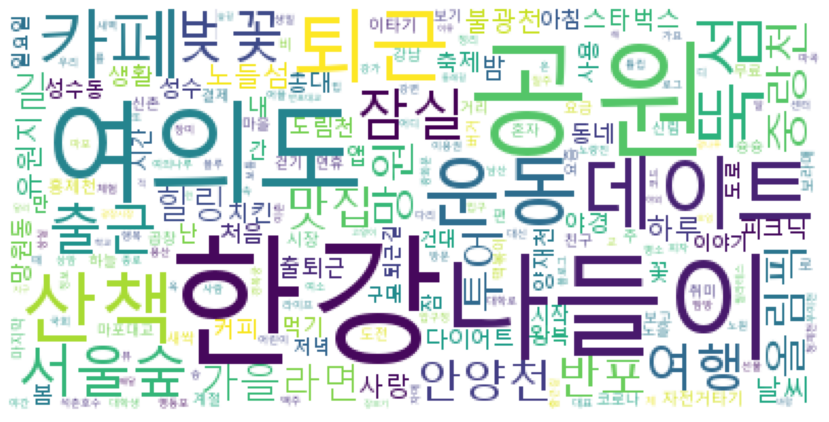

In [91]:
plt.figure(figsize=(15,7.5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
mask=np.array(Image.open('b2.png'))
from wordcloud import ImageColorGenerator
image_colors=ImageColorGenerator(mask)

In [86]:
data = my_title.vocab().most_common(1000)

wc=WordCloud(
    font_path='C:/windows/fonts/malgun.ttf',
    relative_scaling=0.1,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=50,
    colormap = 'summer'
).generate_from_frequencies(dict(data))

dafault_colors = wc.to_array()

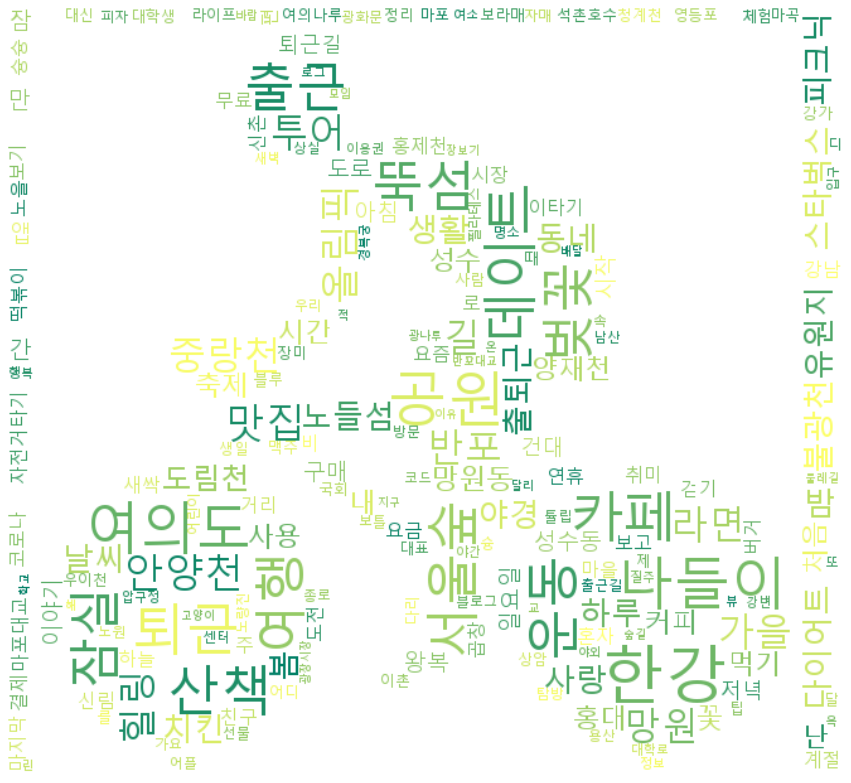

In [87]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()